## Final Project : Classification

This is Sakshi's solution for the **Final Project : Classification**. In this notebook:

1. We will first explore the dataset provided (Reading the data, Variable Identification, Univariate and Bivariate Analysis..etc)
2. We will create models to predict whether a client will subscribe to a term deposit. 
3. We will also make predictions for the clients in the test set which you can submit in the solution_checker.xlsx file to generate accuracy score. 

Let's start by importing the libraries that we will be using.

In [119]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [120]:
# Reading the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Let's check the features present in our data and then we will look at their data types.

In [121]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [122]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that **subscribed**  is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [123]:
train.shape, test.shape

((31647, 18), (13564, 17))

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [124]:
# Print data types for each variable
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [125]:
# Printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


### Exploratory Data Analysis of the Training Dataset

In [126]:
train.shape

(31647, 18)

In [127]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [128]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

The given dataset has no null values at all.

In [129]:
train['age'].mode()

0    32
Name: age, dtype: int64

From the data we can see the most of the customer have an age of 32

In [130]:
train['marital'].mode()

0    married
Name: marital, dtype: object

From the data we can see the most of the customer are married.

In [131]:
train['education'].mode()

0    secondary
Name: education, dtype: object

From the data we can see the most of the customer are having an secondary education.

In [132]:
train['default'].mode()

0    no
Name: default, dtype: object

From the data we can see the most of the customer have no credit in default.

In [133]:
train['balance'].mode()

0    0
Name: balance, dtype: int64

Since it is a continous variable and the balance of different client will be different thats why we dont see any repeatation of balance in this particular data.

In [134]:
train['housing'].mode()

0    yes
Name: housing, dtype: object

Most of the customer have housing loan.

In [135]:
train['loan'].mode()

0    no
Name: loan, dtype: object

Most of the client do not have personal loan.

In [136]:
train.mode()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,2,32.0,blue-collar,married,secondary,no,0.0,yes,no,cellular,20.0,may,90.0,1.0,-1.0,0.0,unknown,no
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,45207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31643,45208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31644,45209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31645,45210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### These are some extra points that we can summarise from the above modes - 

1. Most of the client are using cellular mobiles for communication.
2. Majority of the client are called on 20th of respective month mostly they are contacted on may month .
3. The representatives have contacted the clients for an average for 90 hours and they have contacted most of the customer only ones.
4. Also we can deduce more clients are contacted by representatives were fresh clients for the fixed term.
5. Subscription for fixed term is less because from the data we can say it.



#### From the above data's one can make certain changes for the approaches :

1. Clients who are in the age of 30 - 40 should be contacted frequently and should be given more importance.

2. Most of the clients are having blue collar jobs so, it is hard to predict the promising customer but analysing the transaction history, debt they hold, dependants of them will definitely helps to reach a conclusion.

3. Married people should be approached with care by educating them with the importance of having a term deposit.

4. Majority of the customer dont have credits in default which means they are promising customers.

5. Clients who are having housing loan should be educated how the fixed term deposit is going to help them financially.

6. Clients are approached at the middle of the month that is mostly on 20th day which should be changed to the first or second week which makes them comfortable with their money management.

7. Campaign is done only one time towards the customer which can be done more without annoying the clients.


In [137]:
data=train[train['age']>=30]
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [138]:
data1=data[data['age']<=40] 
data1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no
10,14699,36,services,divorced,secondary,yes,0,no,yes,cellular,15,jul,687,7,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31634,8652,30,technician,single,tertiary,no,432,yes,yes,unknown,3,jun,180,3,-1,0,unknown,no
31635,41379,35,management,married,tertiary,no,4,no,no,cellular,1,sep,157,2,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no


#### data1 will give the clients ages between 30 and 40

In [139]:
data2=data1[data1['duration']<=90]
data2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
30,8653,31,management,single,tertiary,no,-205,yes,no,unknown,3,jun,56,12,-1,0,unknown,no
31,30574,39,management,single,tertiary,no,0,yes,no,cellular,6,feb,13,8,9,2,other,no
33,14133,35,management,single,tertiary,no,0,no,yes,cellular,11,jul,71,3,-1,0,unknown,no
35,30741,32,management,single,tertiary,no,2770,no,no,telephone,6,feb,44,9,-1,0,unknown,no
43,6807,33,blue-collar,married,secondary,no,580,yes,no,unknown,28,may,36,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31599,934,39,blue-collar,married,secondary,yes,-345,yes,no,unknown,7,may,69,1,-1,0,unknown,no
31614,29345,40,blue-collar,married,secondary,yes,231,yes,no,cellular,2,feb,69,3,-1,0,unknown,no
31627,9508,35,services,single,secondary,no,-2,no,no,unknown,6,jun,15,1,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no


#### data2 shows the clients whos contacts duration is less than 90

In [140]:
data3=data2[data2['balance']>=10000]
data3

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1139,26902,36,management,married,tertiary,no,14462,yes,no,cellular,21,nov,10,5,-1,0,unknown,no
2496,26490,30,admin.,single,secondary,no,10735,no,no,cellular,20,nov,63,1,-1,0,unknown,no
2654,15512,38,management,single,tertiary,no,21963,no,no,telephone,18,jul,70,2,-1,0,unknown,no
2698,7363,33,technician,married,tertiary,no,16992,yes,no,unknown,29,may,58,1,-1,0,unknown,no
5194,15870,38,admin.,single,tertiary,no,45789,no,no,telephone,21,jul,21,31,-1,0,unknown,no
5463,23555,30,management,single,tertiary,no,20261,yes,no,cellular,28,aug,81,10,-1,0,unknown,no
6110,8635,36,management,married,tertiary,no,27359,yes,no,unknown,3,jun,71,2,-1,0,unknown,no
6453,34385,33,management,married,tertiary,no,17946,yes,no,cellular,4,may,15,4,87,6,failure,no
7175,25122,30,management,single,tertiary,no,12569,no,no,cellular,18,nov,87,1,-1,0,unknown,no
9417,24033,31,housemaid,single,secondary,no,13099,no,no,cellular,29,aug,6,9,-1,0,unknown,no


#### data4 will give the client who's age is in the range 30 - 40 having 10000 above balance which are contacted less than 90 contacts duration (We assumed that above clients who's balance above 10000 have higher chance of subscribing) .

In [141]:
data5=train[train['job']=='blue-collar']
data5

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
11,30180,35,blue-collar,married,secondary,no,-151,yes,no,cellular,5,feb,96,2,-1,0,unknown,no
14,3260,43,blue-collar,married,secondary,no,960,yes,no,unknown,15,may,436,1,-1,0,unknown,no
18,35310,44,blue-collar,married,primary,no,4031,yes,no,cellular,7,may,983,4,-1,0,unknown,yes
19,38291,48,blue-collar,divorced,secondary,no,501,yes,no,cellular,15,may,12,5,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31608,2384,26,blue-collar,single,secondary,no,309,yes,no,unknown,13,may,210,1,-1,0,unknown,no
31614,29345,40,blue-collar,married,secondary,yes,231,yes,no,cellular,2,feb,69,3,-1,0,unknown,no
31618,8778,21,blue-collar,single,secondary,yes,-59,yes,yes,unknown,4,jun,83,1,-1,0,unknown,no
31632,5195,33,blue-collar,married,secondary,no,0,yes,no,unknown,21,may,521,3,-1,0,unknown,yes


In [142]:
data6=data5[data5['balance']>=10000]
data6

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
434,26768,54,blue-collar,divorced,primary,no,10374,yes,no,cellular,20,nov,283,2,189,2,other,no
845,39687,32,blue-collar,married,secondary,no,10287,yes,no,cellular,27,may,281,4,188,1,failure,yes
1710,4136,30,blue-collar,married,secondary,no,12697,yes,yes,unknown,19,may,95,1,-1,0,unknown,no
1806,26780,59,blue-collar,single,secondary,no,12270,no,no,cellular,20,nov,180,2,-1,0,unknown,no
1830,33593,34,blue-collar,married,primary,no,15841,yes,no,cellular,20,apr,423,5,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29712,26592,34,blue-collar,married,tertiary,no,17672,no,no,cellular,20,nov,548,1,-1,0,unknown,no
29831,23796,51,blue-collar,married,primary,no,21614,no,no,cellular,29,aug,47,20,-1,0,unknown,no
30774,5614,37,blue-collar,married,secondary,no,13849,yes,no,unknown,23,may,252,5,-1,0,unknown,no
30937,18061,29,blue-collar,single,tertiary,no,11310,yes,no,cellular,30,jul,436,3,-1,0,unknown,no


In [143]:
data7=data6[data6['subscribed']=='no']
data7

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
434,26768,54,blue-collar,divorced,primary,no,10374,yes,no,cellular,20,nov,283,2,189,2,other,no
1710,4136,30,blue-collar,married,secondary,no,12697,yes,yes,unknown,19,may,95,1,-1,0,unknown,no
1806,26780,59,blue-collar,single,secondary,no,12270,no,no,cellular,20,nov,180,2,-1,0,unknown,no
1830,33593,34,blue-collar,married,primary,no,15841,yes,no,cellular,20,apr,423,5,-1,0,unknown,no
1891,13489,60,blue-collar,married,secondary,no,19447,yes,no,telephone,9,jul,196,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29712,26592,34,blue-collar,married,tertiary,no,17672,no,no,cellular,20,nov,548,1,-1,0,unknown,no
29831,23796,51,blue-collar,married,primary,no,21614,no,no,cellular,29,aug,47,20,-1,0,unknown,no
30774,5614,37,blue-collar,married,secondary,no,13849,yes,no,unknown,23,may,252,5,-1,0,unknown,no
30937,18061,29,blue-collar,single,tertiary,no,11310,yes,no,cellular,30,jul,436,3,-1,0,unknown,no


#### data7 will give us the blue-collar job category clients having a balance of 10000 or above who has not subscribed and should be given importance.

In [144]:
data8=train[train['marital']=='married']
data9=data8[data8['balance']>=10000]
data10=data9[data9['subscribed']=='no']
data10

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
26,9934,60,retired,married,primary,no,17413,no,no,unknown,9,jun,200,1,-1,0,unknown,no
268,21497,47,technician,married,secondary,no,17206,yes,no,cellular,19,aug,125,4,-1,0,unknown,no
418,39933,58,technician,married,tertiary,no,12322,no,no,telephone,2,jun,306,2,-1,0,unknown,no
497,40401,61,retired,married,secondary,no,13164,no,no,cellular,1,jul,92,1,-1,0,unknown,no
609,9048,52,housemaid,married,secondary,no,14363,no,no,unknown,5,jun,132,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30849,24777,44,technician,married,secondary,no,10888,yes,no,cellular,18,nov,67,1,105,1,failure,no
30860,19463,43,management,married,tertiary,no,11754,no,no,cellular,7,aug,352,2,-1,0,unknown,no
31204,22324,41,management,married,tertiary,no,15449,no,no,cellular,22,aug,136,9,-1,0,unknown,no
31462,27273,43,management,married,tertiary,no,13015,yes,no,cellular,21,nov,56,1,-1,0,unknown,no


#### data10 will give us the Married clients who are having a balance above 10000 but not yet subscribed and should be given importance.

*Average of age, balance and duration*

In [145]:
train[['age','balance','duration']].mean()

age           40.957247
balance     1363.890258
duration     258.113534
dtype: float64

*Median of age, balance and duration*

In [146]:
train[['age','balance','duration']].median()

age          39.0
balance     450.0
duration    180.0
dtype: float64

*Variance of age, balance and duration*

In [147]:
train[['age','balance','duration']].var()

age         1.128935e+02
balance     9.170627e+06
duration    6.611017e+04
dtype: float64

*Standard Deviation of age, balance and duration*

In [148]:
train[['age','balance','duration']].std()

age           10.625134
balance     3028.304293
duration     257.118973
dtype: float64

(array([3631.,    0.,    0.,    0.,  206.,    0.,    0.,    0.,    0.,
        2903.,    0.,    0.,    0., 6639.,    0.,    0.,    0.,    0.,
        5307.,    0.,    0.,    0., 1574.,    0.,    0.,    0.,    0.,
        6842.,    0.,    0.,    0.,  874.,    0.,    0.,    0.,    0.,
        1123.,    0.,    0.,    0.,  635.,    0.,    0.,    0.,    0.,
        1008.,    0.,    0.,    0.,  905.]),
 array([ 0.  ,  0.22,  0.44,  0.66,  0.88,  1.1 ,  1.32,  1.54,  1.76,
         1.98,  2.2 ,  2.42,  2.64,  2.86,  3.08,  3.3 ,  3.52,  3.74,
         3.96,  4.18,  4.4 ,  4.62,  4.84,  5.06,  5.28,  5.5 ,  5.72,
         5.94,  6.16,  6.38,  6.6 ,  6.82,  7.04,  7.26,  7.48,  7.7 ,
         7.92,  8.14,  8.36,  8.58,  8.8 ,  9.02,  9.24,  9.46,  9.68,
         9.9 , 10.12, 10.34, 10.56, 10.78, 11.  ]),
 <BarContainer object of 50 artists>)

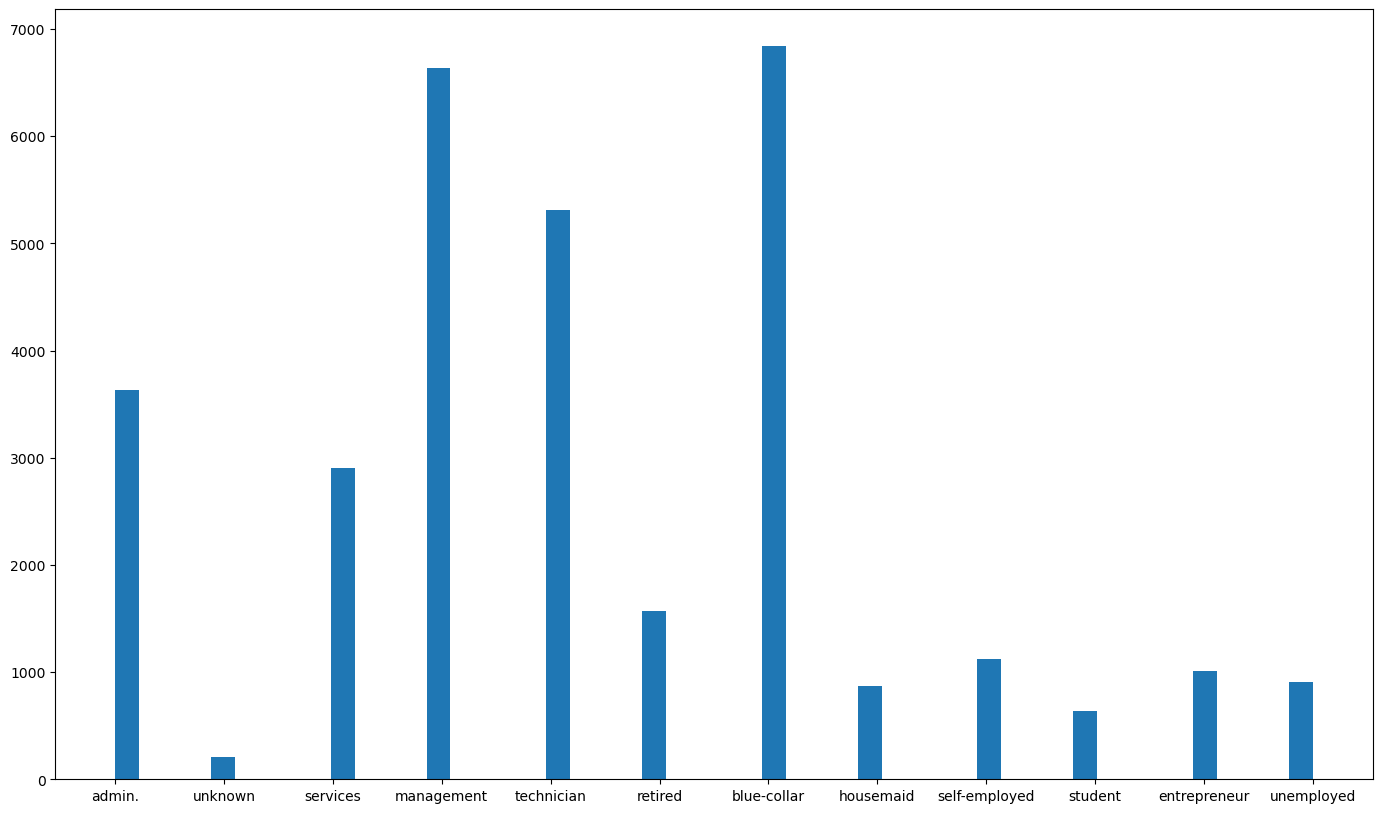

In [149]:
plt.figure(figsize=(17,10))
plt.hist(train['job'],bins=50)

#### blue-collar, management, technician and administrative constitutes the majority of the job category.

(array([19095.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3630.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  8922.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]),
 <BarContainer object of 50 artists>)

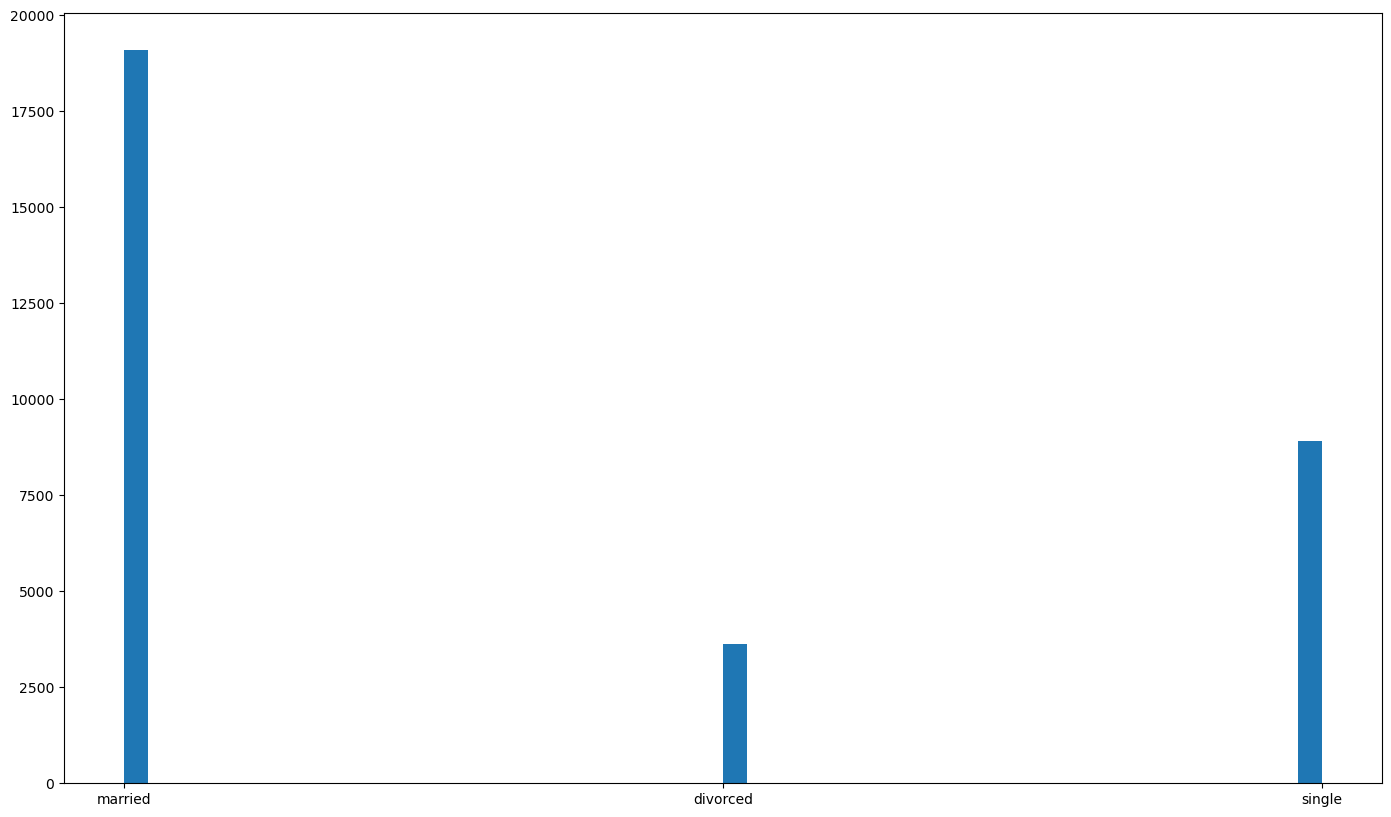

In [150]:
plt.figure(figsize=(17,10))
plt.hist(train['marital'],bins=50)

(array([ 1314.,     0.,     0., 16224.,     0.,     0.,  9301.,     0.,
            0.,  4808.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

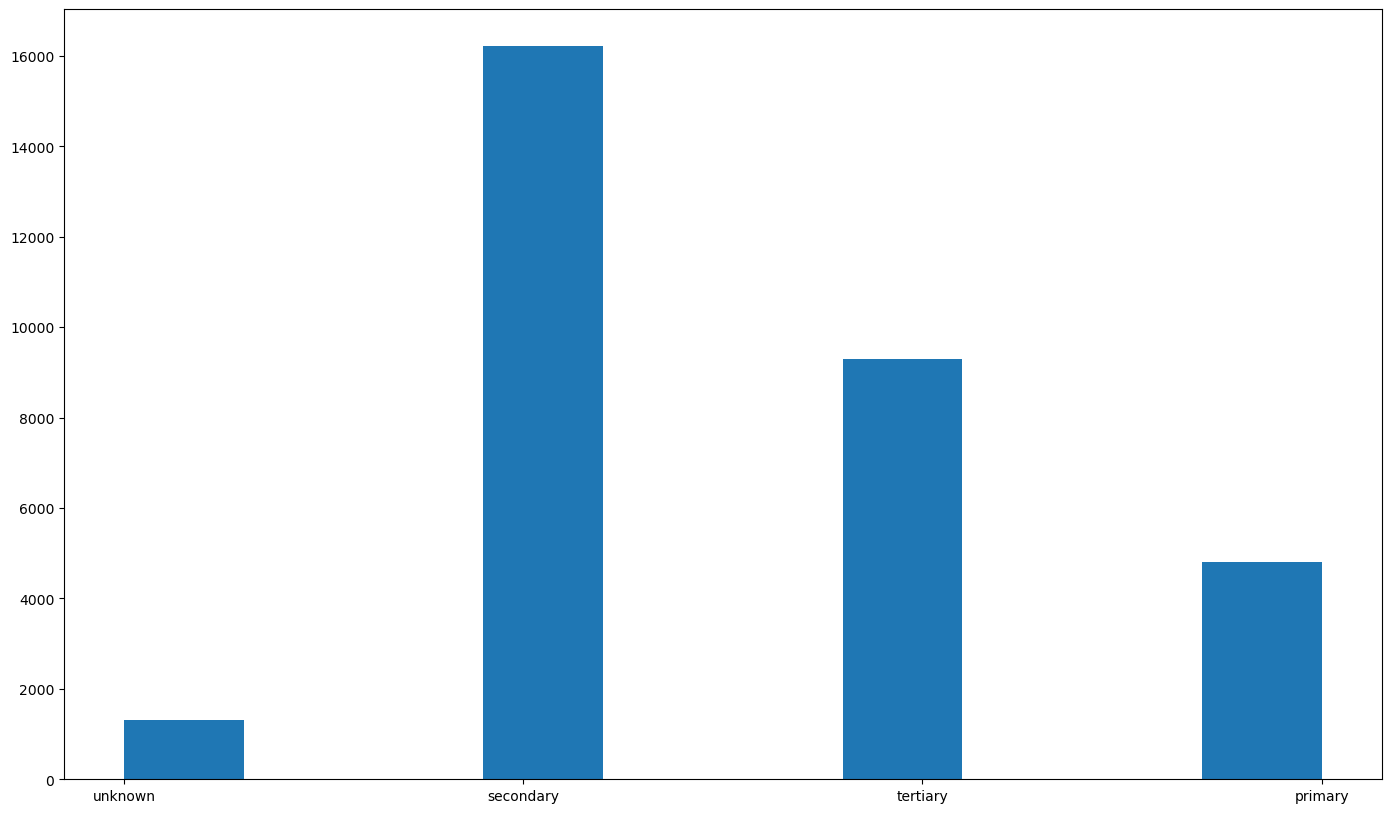

In [151]:
plt.figure(figsize=(17,10))
plt.hist(train['education'],bins=10)

(array([31062.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   585.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

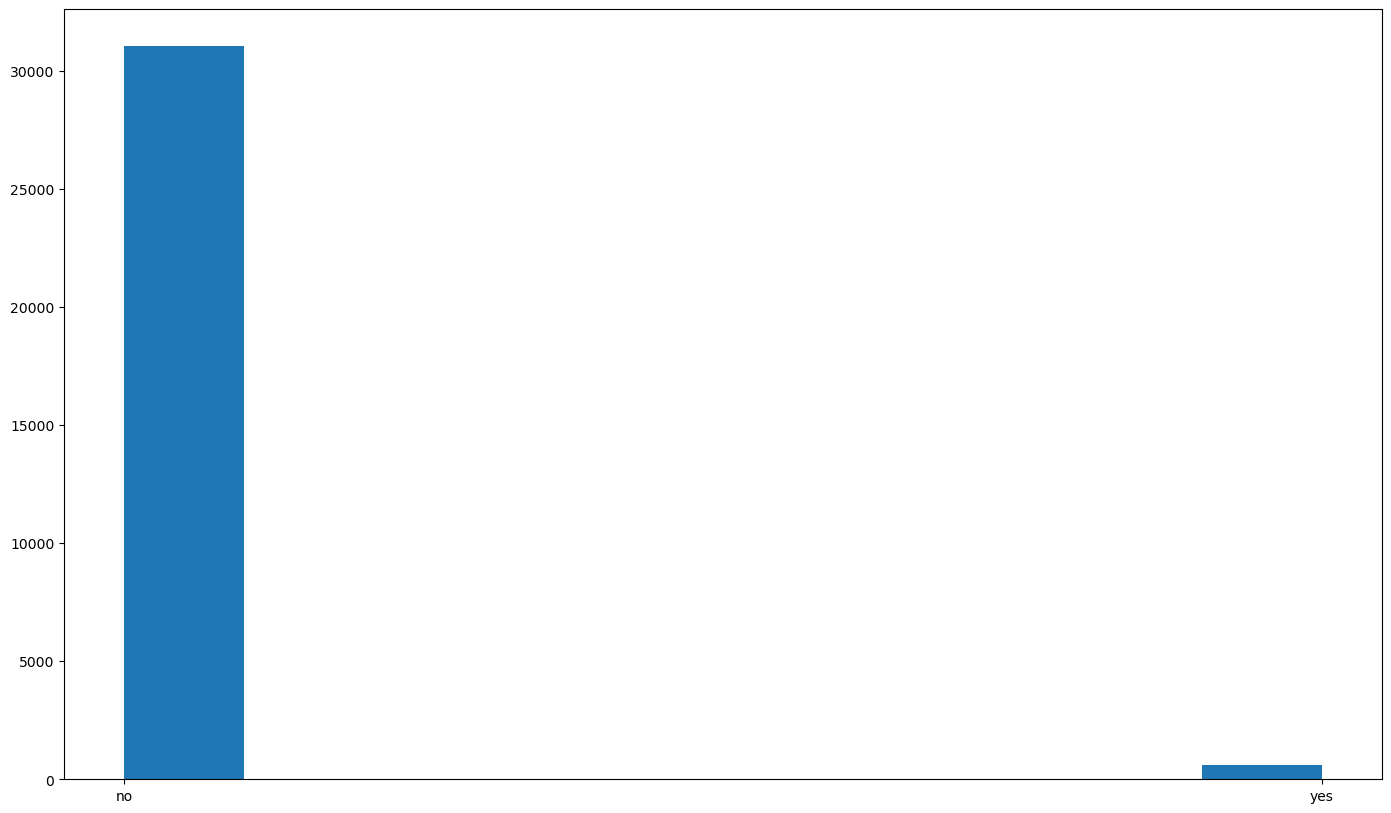

In [152]:
plt.figure(figsize=(17,10))
plt.hist(train['default'],bins=10)

(array([26516.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5131.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

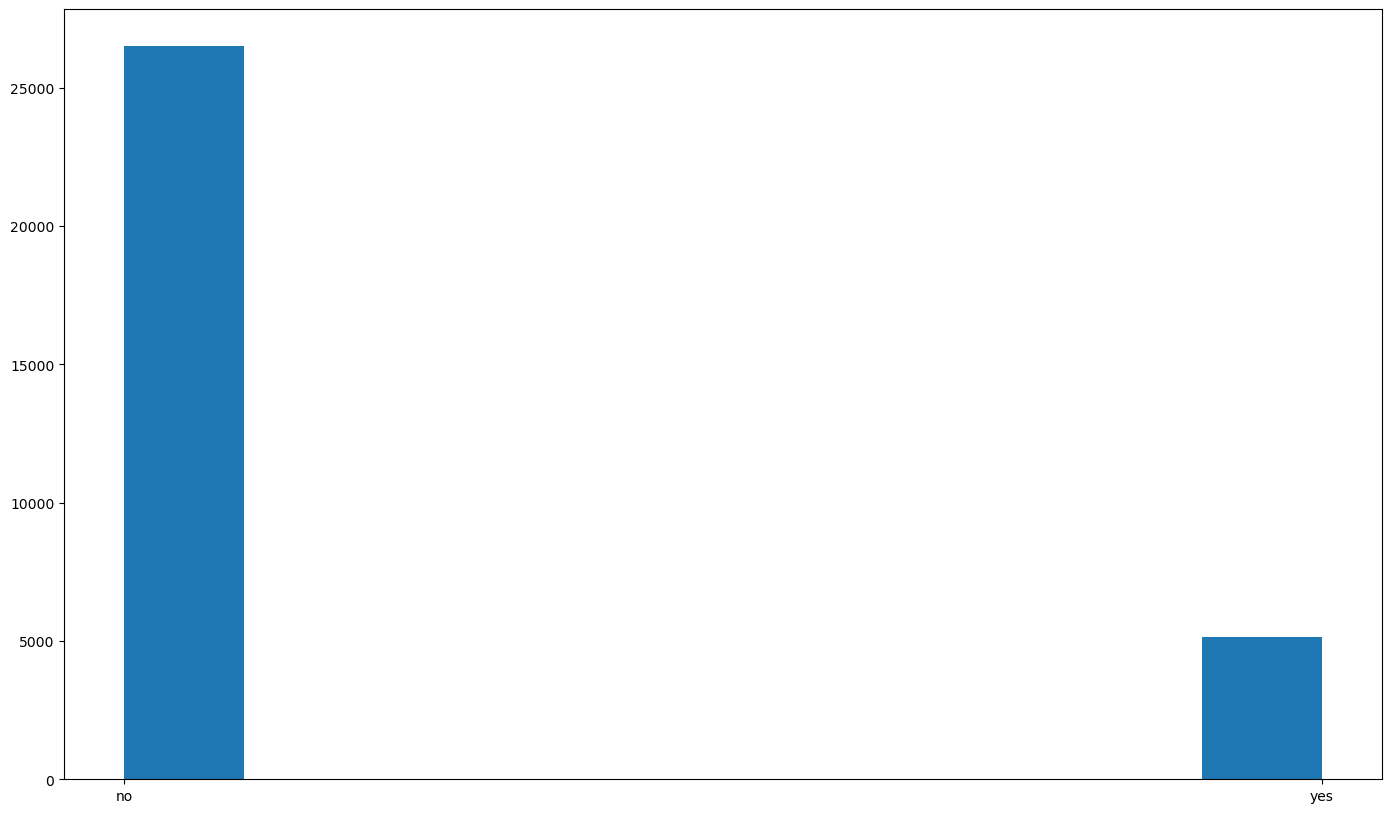

In [153]:
plt.figure(figsize=(17,10))
plt.hist(train['loan'],bins=10)

(array([14063.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17584.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

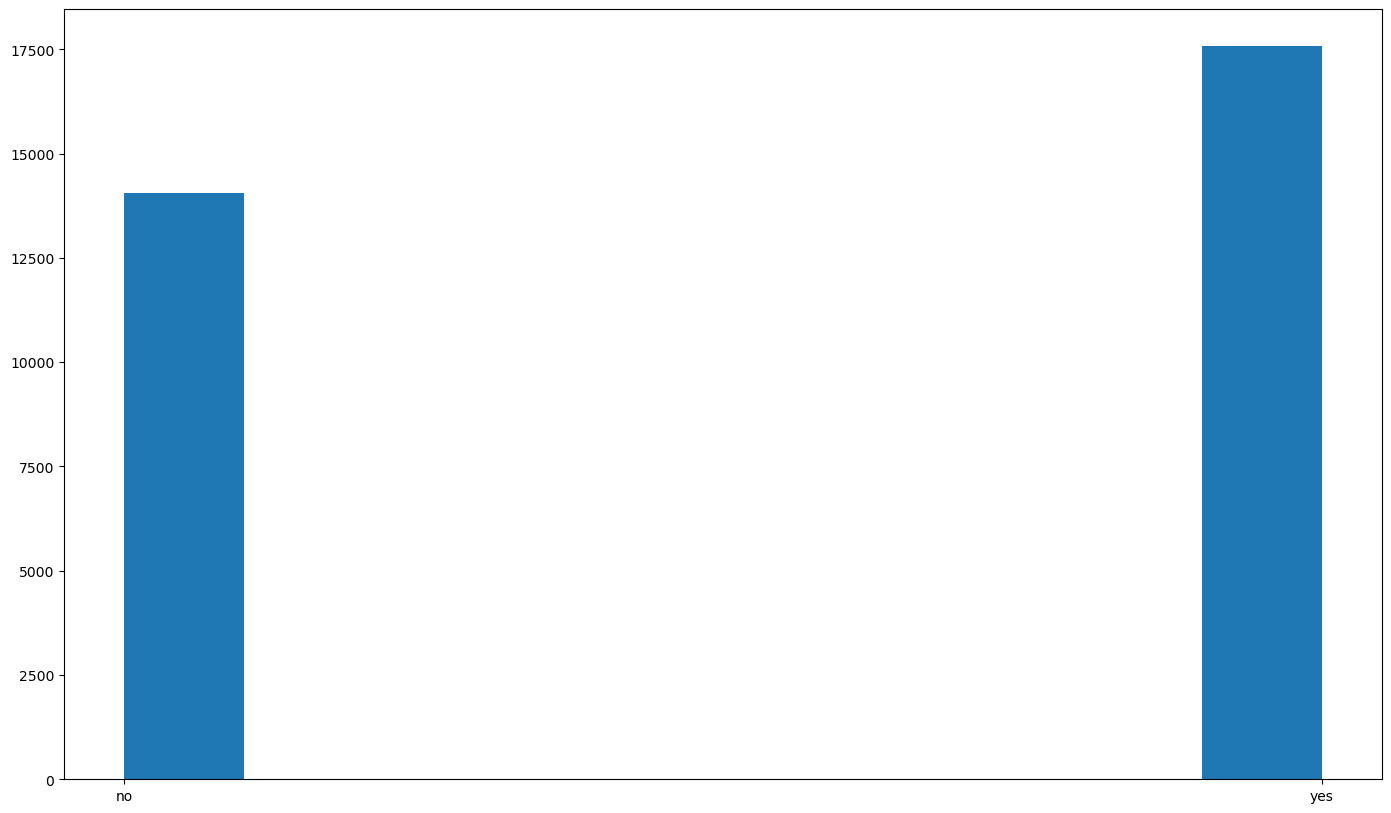

In [154]:
plt.figure(figsize=(17,10))
plt.hist(train['housing'],bins=10)

(array([ 2047.,     0.,     0.,     0.,     0., 20423.,     0.,     0.,
            0.,  9177.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

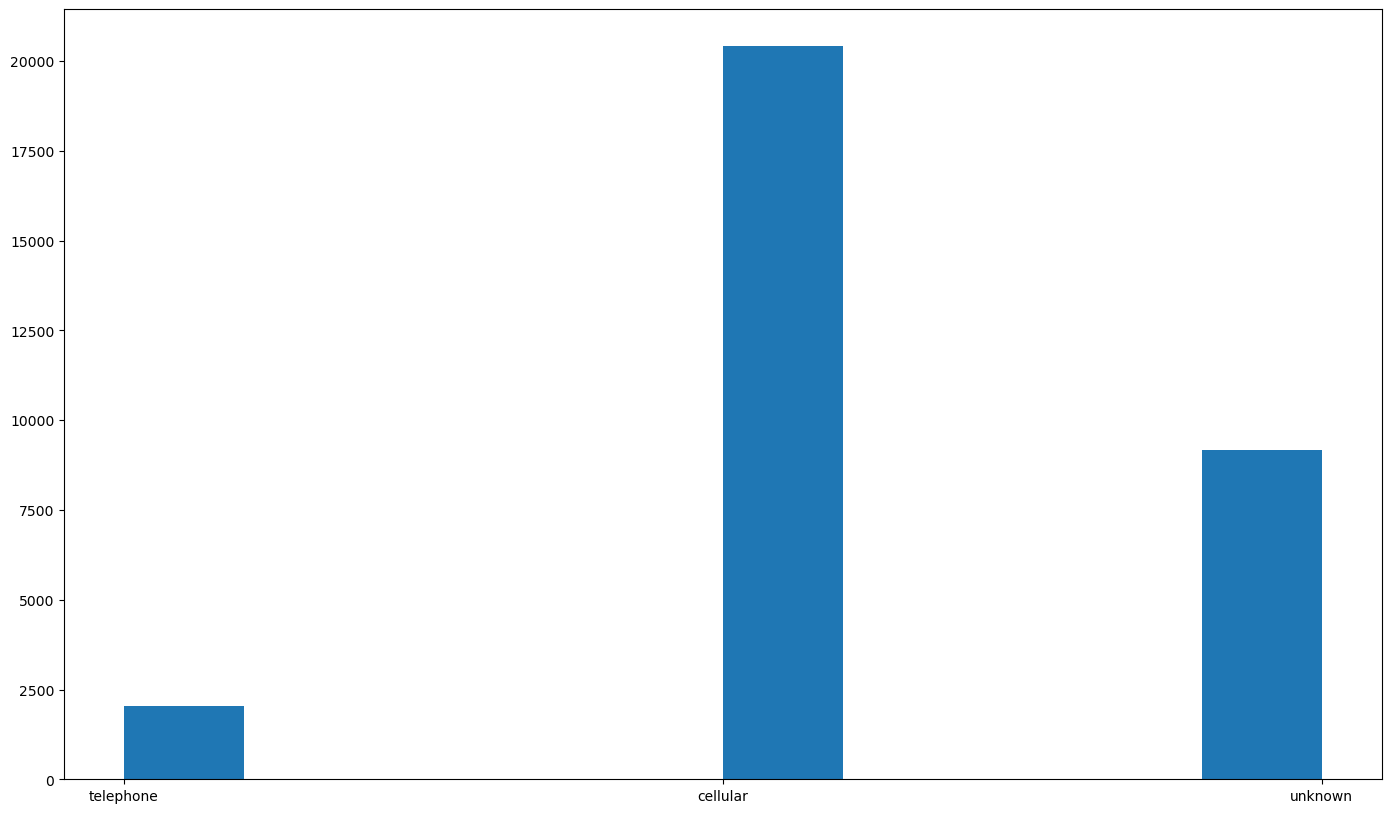

In [155]:
plt.figure(figsize=(17,10))
plt.hist(train['contact'],bins=10)

(array([7627., 3738., 1827.,  410.,  977., 9669., 4333., 2055.,  512.,
         499.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

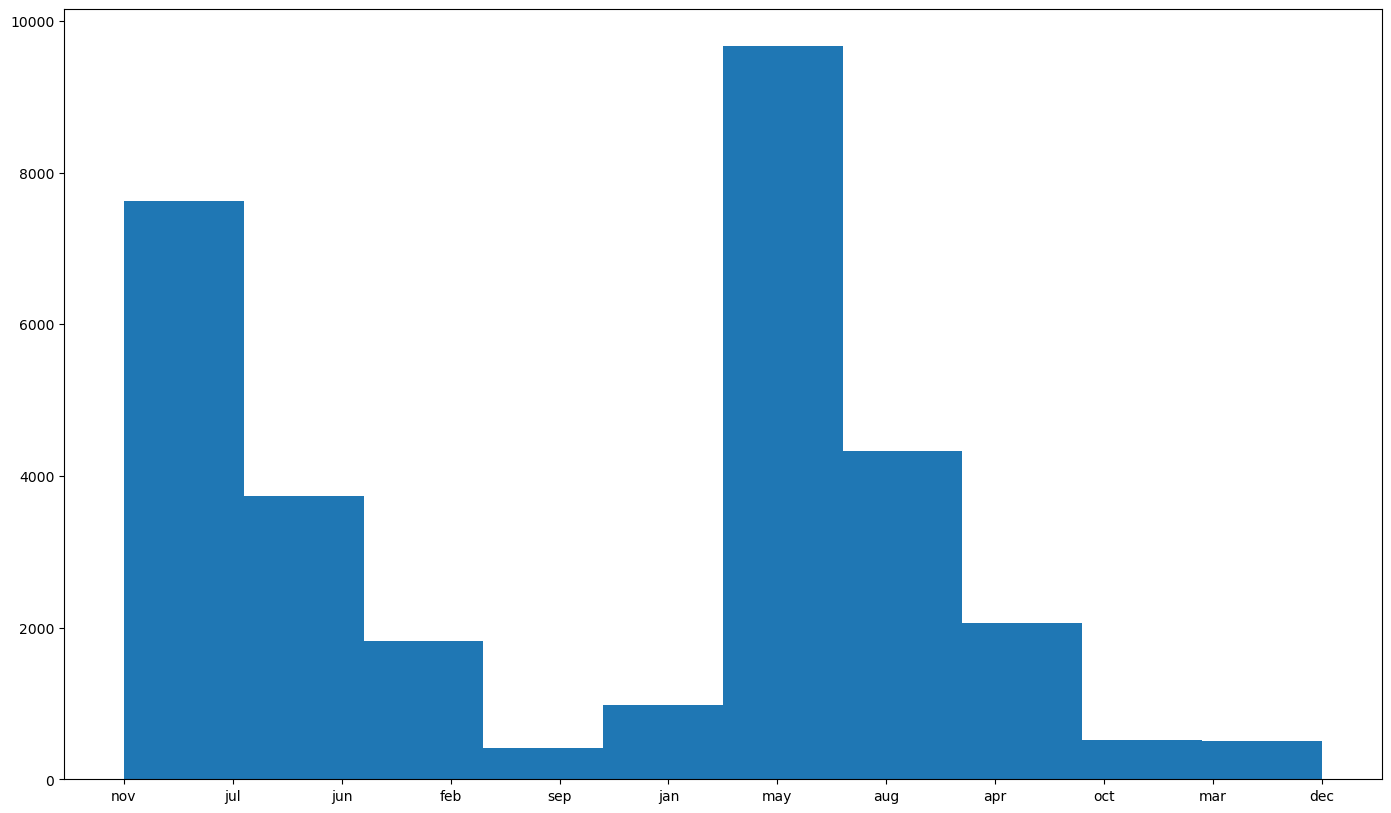

In [156]:
plt.figure(figsize=(17,10))
plt.hist(train['month'],bins=10)

(array([25929.,     0.,     0.,  1068.,     0.,     0.,  3362.,     0.,
            0.,  1288.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

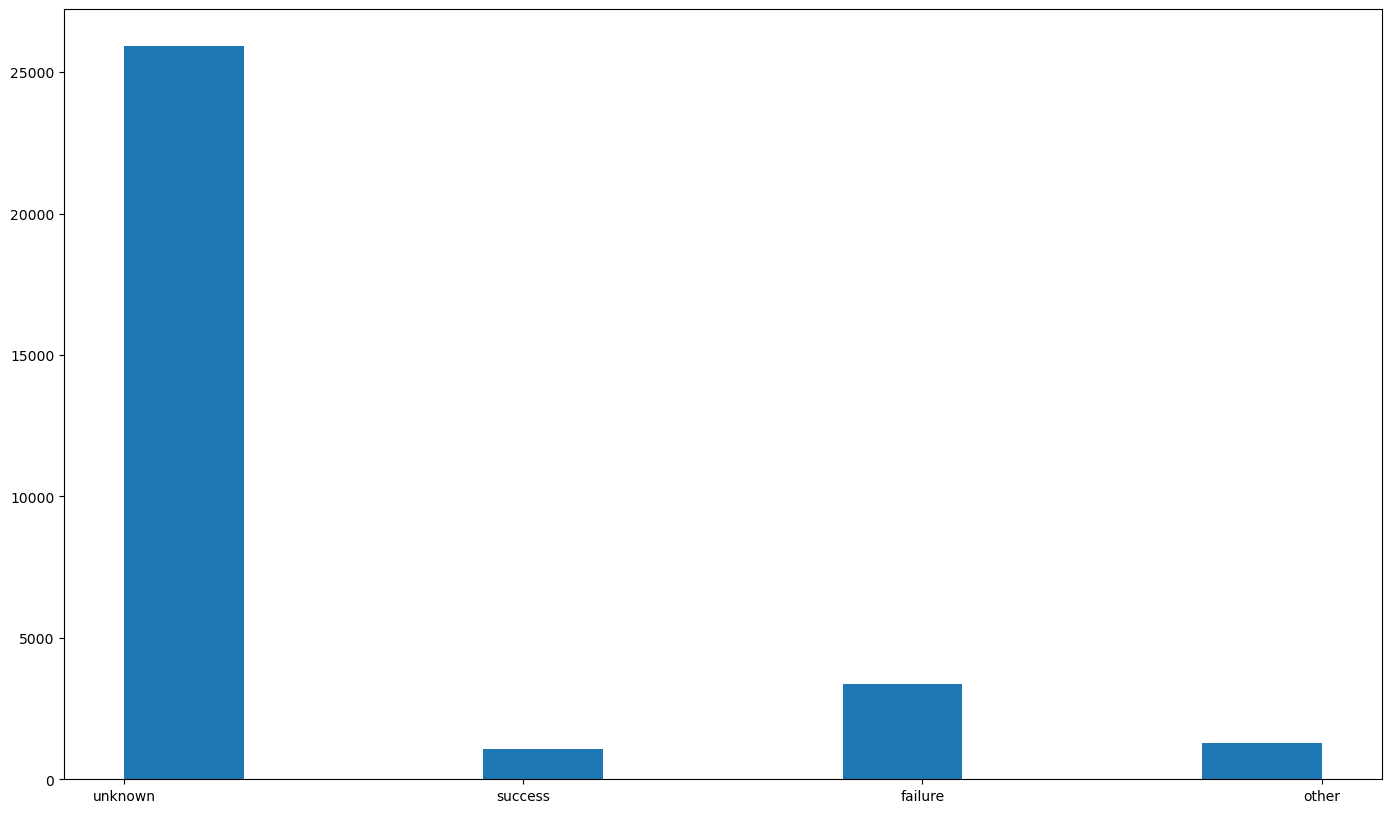

In [157]:
plt.figure(figsize=(17,10))
plt.hist(train['poutcome'],bins=10)

(array([27932.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3715.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

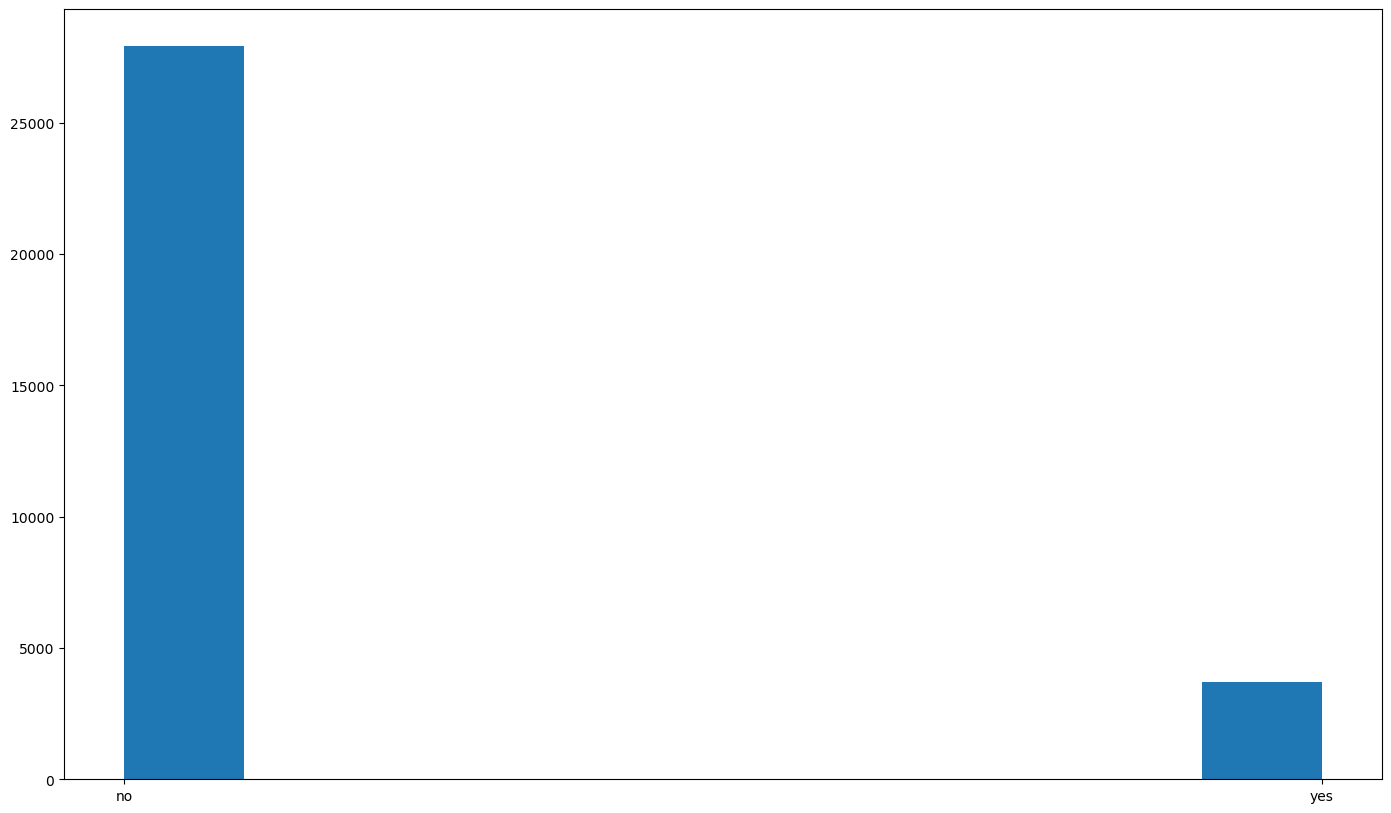

In [158]:
plt.figure(figsize=(17,10))
plt.hist(train['subscribed'],bins=10)

<AxesSubplot:xlabel='age'>

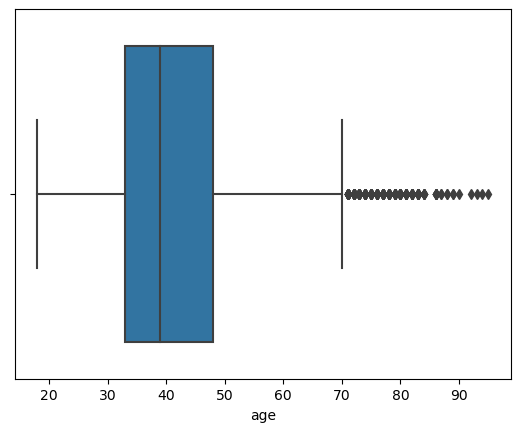

In [159]:
sns.boxplot(train['age'])

<AxesSubplot:xlabel='balance'>

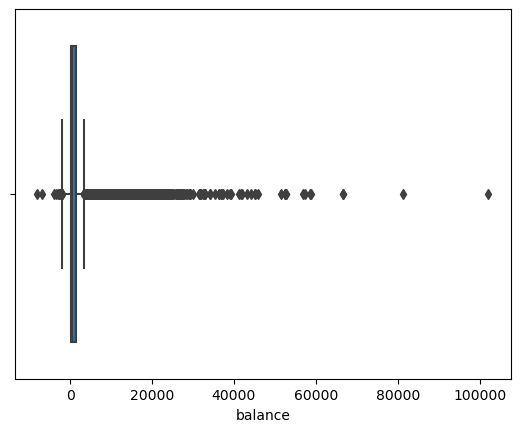

In [160]:
sns.boxplot(train['balance'])

## Scatter Plot : used in bivariate analysis. To study relation between two continuous variables.

<AxesSubplot:xlabel='age', ylabel='balance'>

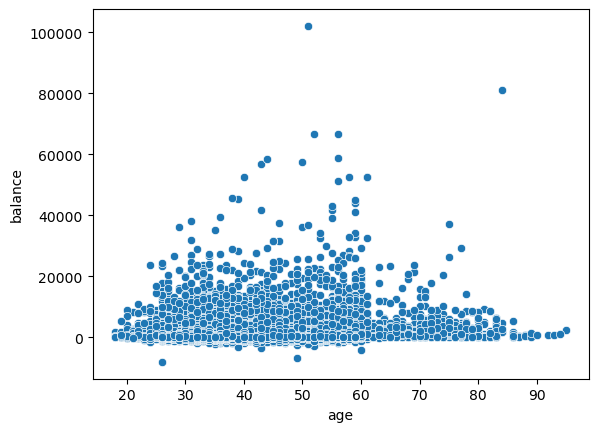

In [161]:
sns.scatterplot(x=train['age'],y=train['balance'])

#### Clients in the age of 40-60 have higher balance ranging upto 100000.

<AxesSubplot:xlabel='age', ylabel='duration'>

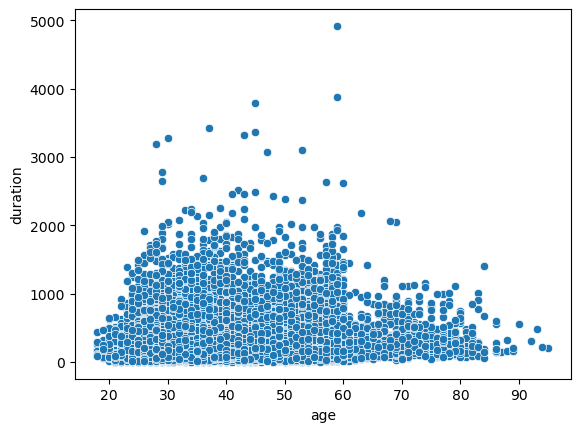

In [162]:
sns.scatterplot(x=train['age'],y=train['duration'])

#### Contact duration for clients from 60-90 are less.

<AxesSubplot:xlabel='age', ylabel='campaign'>

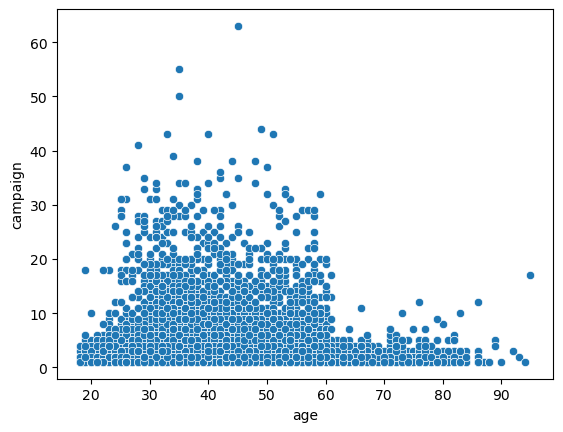

In [163]:
sns.scatterplot(x=train['age'],y=train['campaign'])

#### As a part of campaign clients having the age from 25-60 are contacted continously, with the highest number of contact performed > 60

<AxesSubplot:xlabel='balance', ylabel='campaign'>

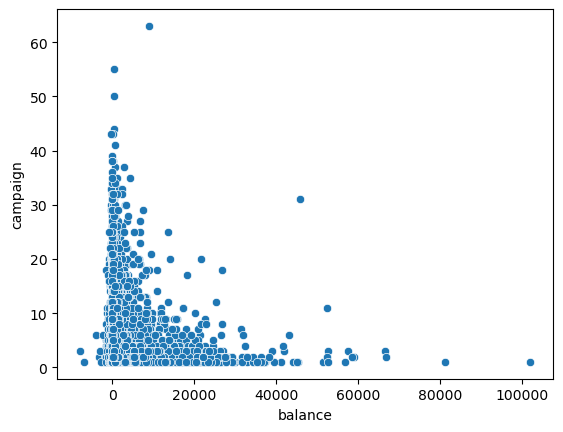

In [164]:
sns.scatterplot(x=train['balance'],y=train['campaign'])

In [165]:
train[train['balance']>=100000]

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
28050,39990,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no


#### Client id 39990 who has good profile should be approached more often. Campaigning has been done only one time.

<AxesSubplot:xlabel='balance', ylabel='duration'>

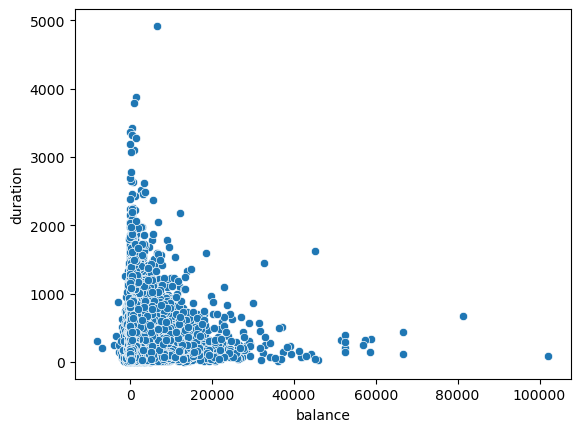

In [166]:
sns.scatterplot(x=train['balance'],y=train['duration'])

<AxesSubplot:xlabel='duration', ylabel='campaign'>

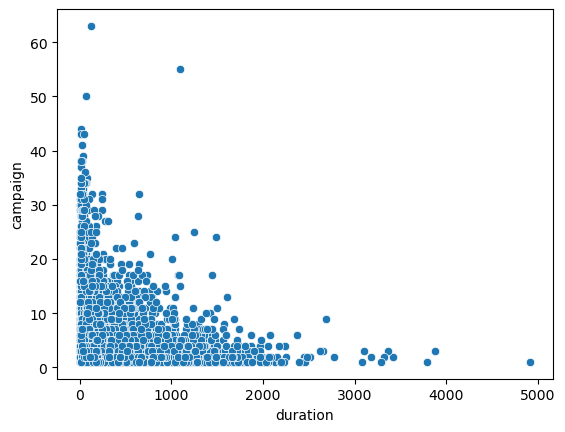

In [167]:
sns.scatterplot(x=train['duration'],y=train['campaign'])

<AxesSubplot:xlabel='balance', ylabel='previous'>

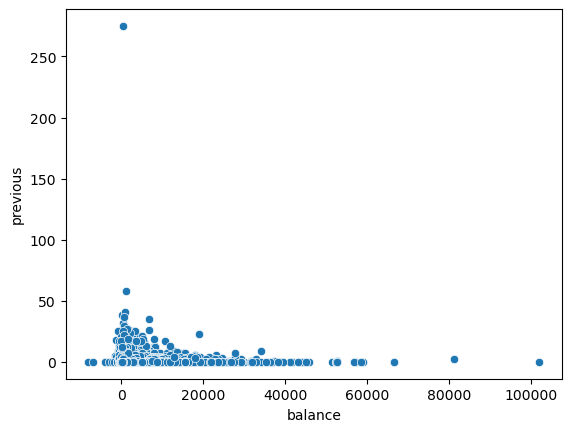

In [168]:
sns.scatterplot(x=train['balance'],y=train['previous'])

In [169]:
data11=train[train['balance']==0]
data12=data11[data11['duration']>=90]
data12

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
10,14699,36,services,divorced,secondary,yes,0,no,yes,cellular,15,jul,687,7,-1,0,unknown,yes
46,29317,27,technician,single,unknown,no,0,yes,no,cellular,2,feb,168,1,-1,0,unknown,no
65,11815,38,management,married,tertiary,no,0,yes,no,unknown,20,jun,211,2,-1,0,unknown,no
66,41699,24,management,single,tertiary,no,0,no,no,cellular,6,oct,526,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31574,34551,57,retired,married,secondary,no,0,yes,no,cellular,5,may,127,1,363,4,failure,no
31604,3845,54,technician,divorced,secondary,no,0,yes,no,unknown,16,may,161,1,-1,0,unknown,no
31619,1159,59,retired,married,unknown,no,0,no,no,unknown,8,may,425,6,-1,0,unknown,no
31632,5195,33,blue-collar,married,secondary,no,0,yes,no,unknown,21,may,521,3,-1,0,unknown,yes


#### Clients having balance '0' are contacted more than duration 90.

## Boxplot for continous-categorical variable

#### Will give the distribution of the data,median,Q1 and Q2

<AxesSubplot:xlabel='age', ylabel='job'>

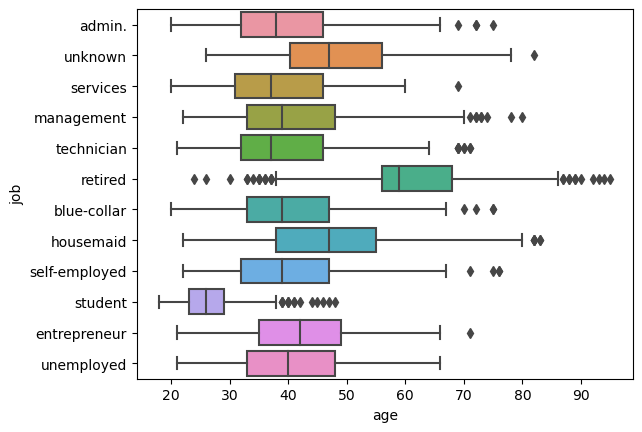

In [170]:
sns.boxplot(x=train['age'],y=train['job'])

<AxesSubplot:xlabel='age', ylabel='marital'>

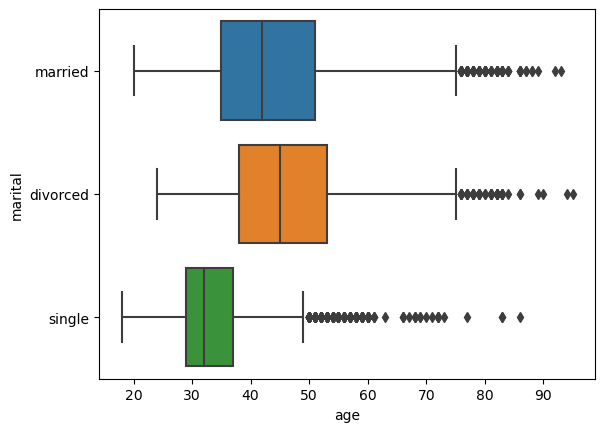

In [171]:
sns.boxplot(x=train['age'],y=train['marital'])

<AxesSubplot:xlabel='age', ylabel='education'>

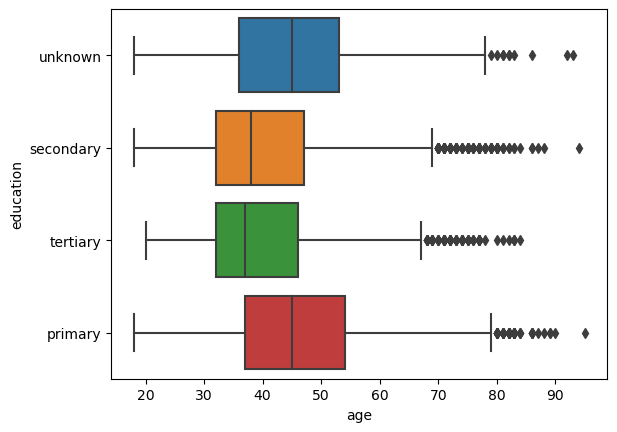

In [173]:
sns.boxplot(x=train['age'],y=train['education'])

<AxesSubplot:xlabel='age', ylabel='default'>

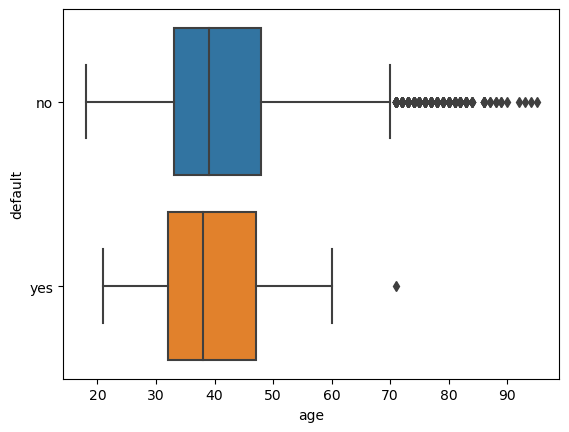

In [174]:
sns.boxplot(x=train['age'],y=train['default'])

<AxesSubplot:xlabel='age', ylabel='housing'>

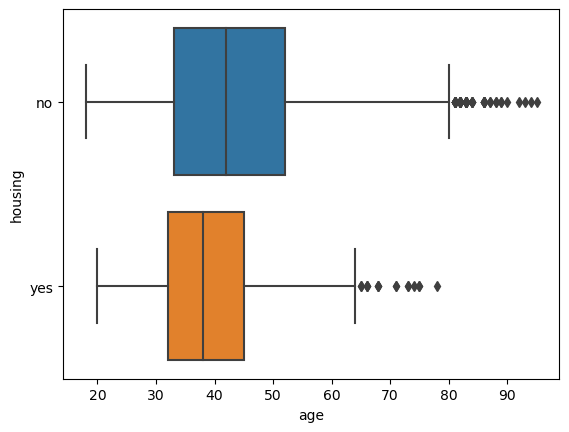

In [175]:
sns.boxplot(x=train['age'],y=train['housing'])

<AxesSubplot:xlabel='age', ylabel='loan'>

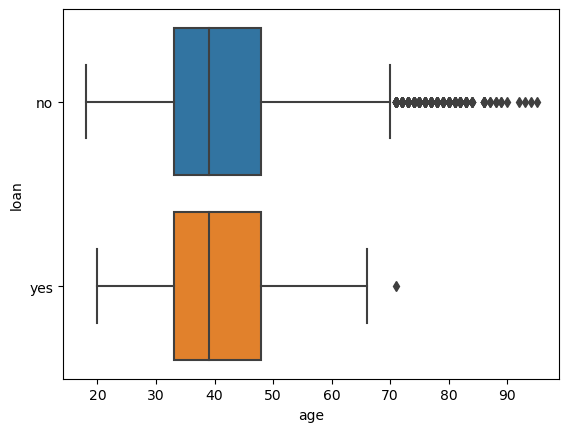

In [176]:
sns.boxplot(x=train['age'],y=train['loan'])

<AxesSubplot:xlabel='age', ylabel='contact'>

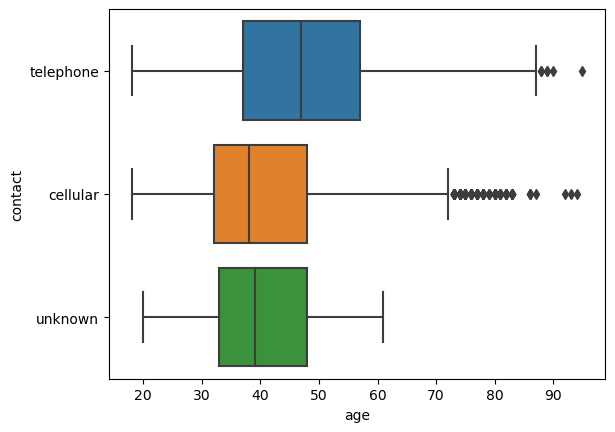

In [177]:
sns.boxplot(x=train['age'],y=train['contact'])

<AxesSubplot:xlabel='age', ylabel='subscribed'>

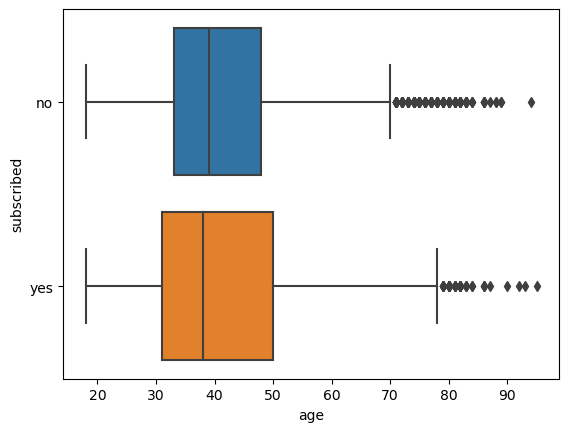

In [178]:
sns.boxplot(x=train['age'],y=train['subscribed'])

#### Half of the subscribed clients are having age between 30-50

<AxesSubplot:xlabel='age', ylabel='poutcome'>

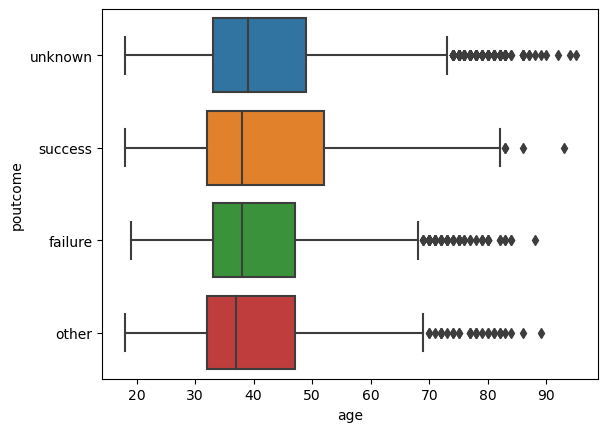

In [179]:
sns.boxplot(x=train['age'],y=train['poutcome'])

## Crosstab for categorical-categorical bivariate analysis.

In [180]:
pd.crosstab(train['marital'] ,train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


#### Subscription of divorced people is less.

In [181]:
pd.crosstab(train['subscribed'] ,train['housing'])

housing,no,yes
subscribed,,
no,11698,16234
yes,2365,1350


In [182]:
pd.crosstab(train['subscribed'] ,train['default'])

default,no,yes
subscribed,,
no,27388,544
yes,3674,41


#### Clients who have no history of default in credit have chance for subscription.

In [183]:
pd.crosstab(train['subscribed'] ,train['loan'])

loan,no,yes
subscribed,,
no,23132,4800
yes,3384,331


#### Customer having personal loan is less likely to subscribe.

In [184]:
pd.crosstab(train.subscribed ,train.contact)

contact,cellular,telephone,unknown
subscribed,,,
no,17352,1779,8801
yes,3071,268,376


In [185]:
pd.crosstab(train.subscribed ,train.month)

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
subscribed,,,,,,,,,,,,
no,1671,3813,85,1522,880,4403,3355,168,9020,2508,288,219
yes,384,520,72,305,97,441,383,174,649,275,224,191


In [186]:
pd.crosstab(train.subscribed ,train.poutcome)

poutcome,failure,other,success,unknown
subscribed,,,,
no,2931,1071,374,23556
yes,431,217,694,2373


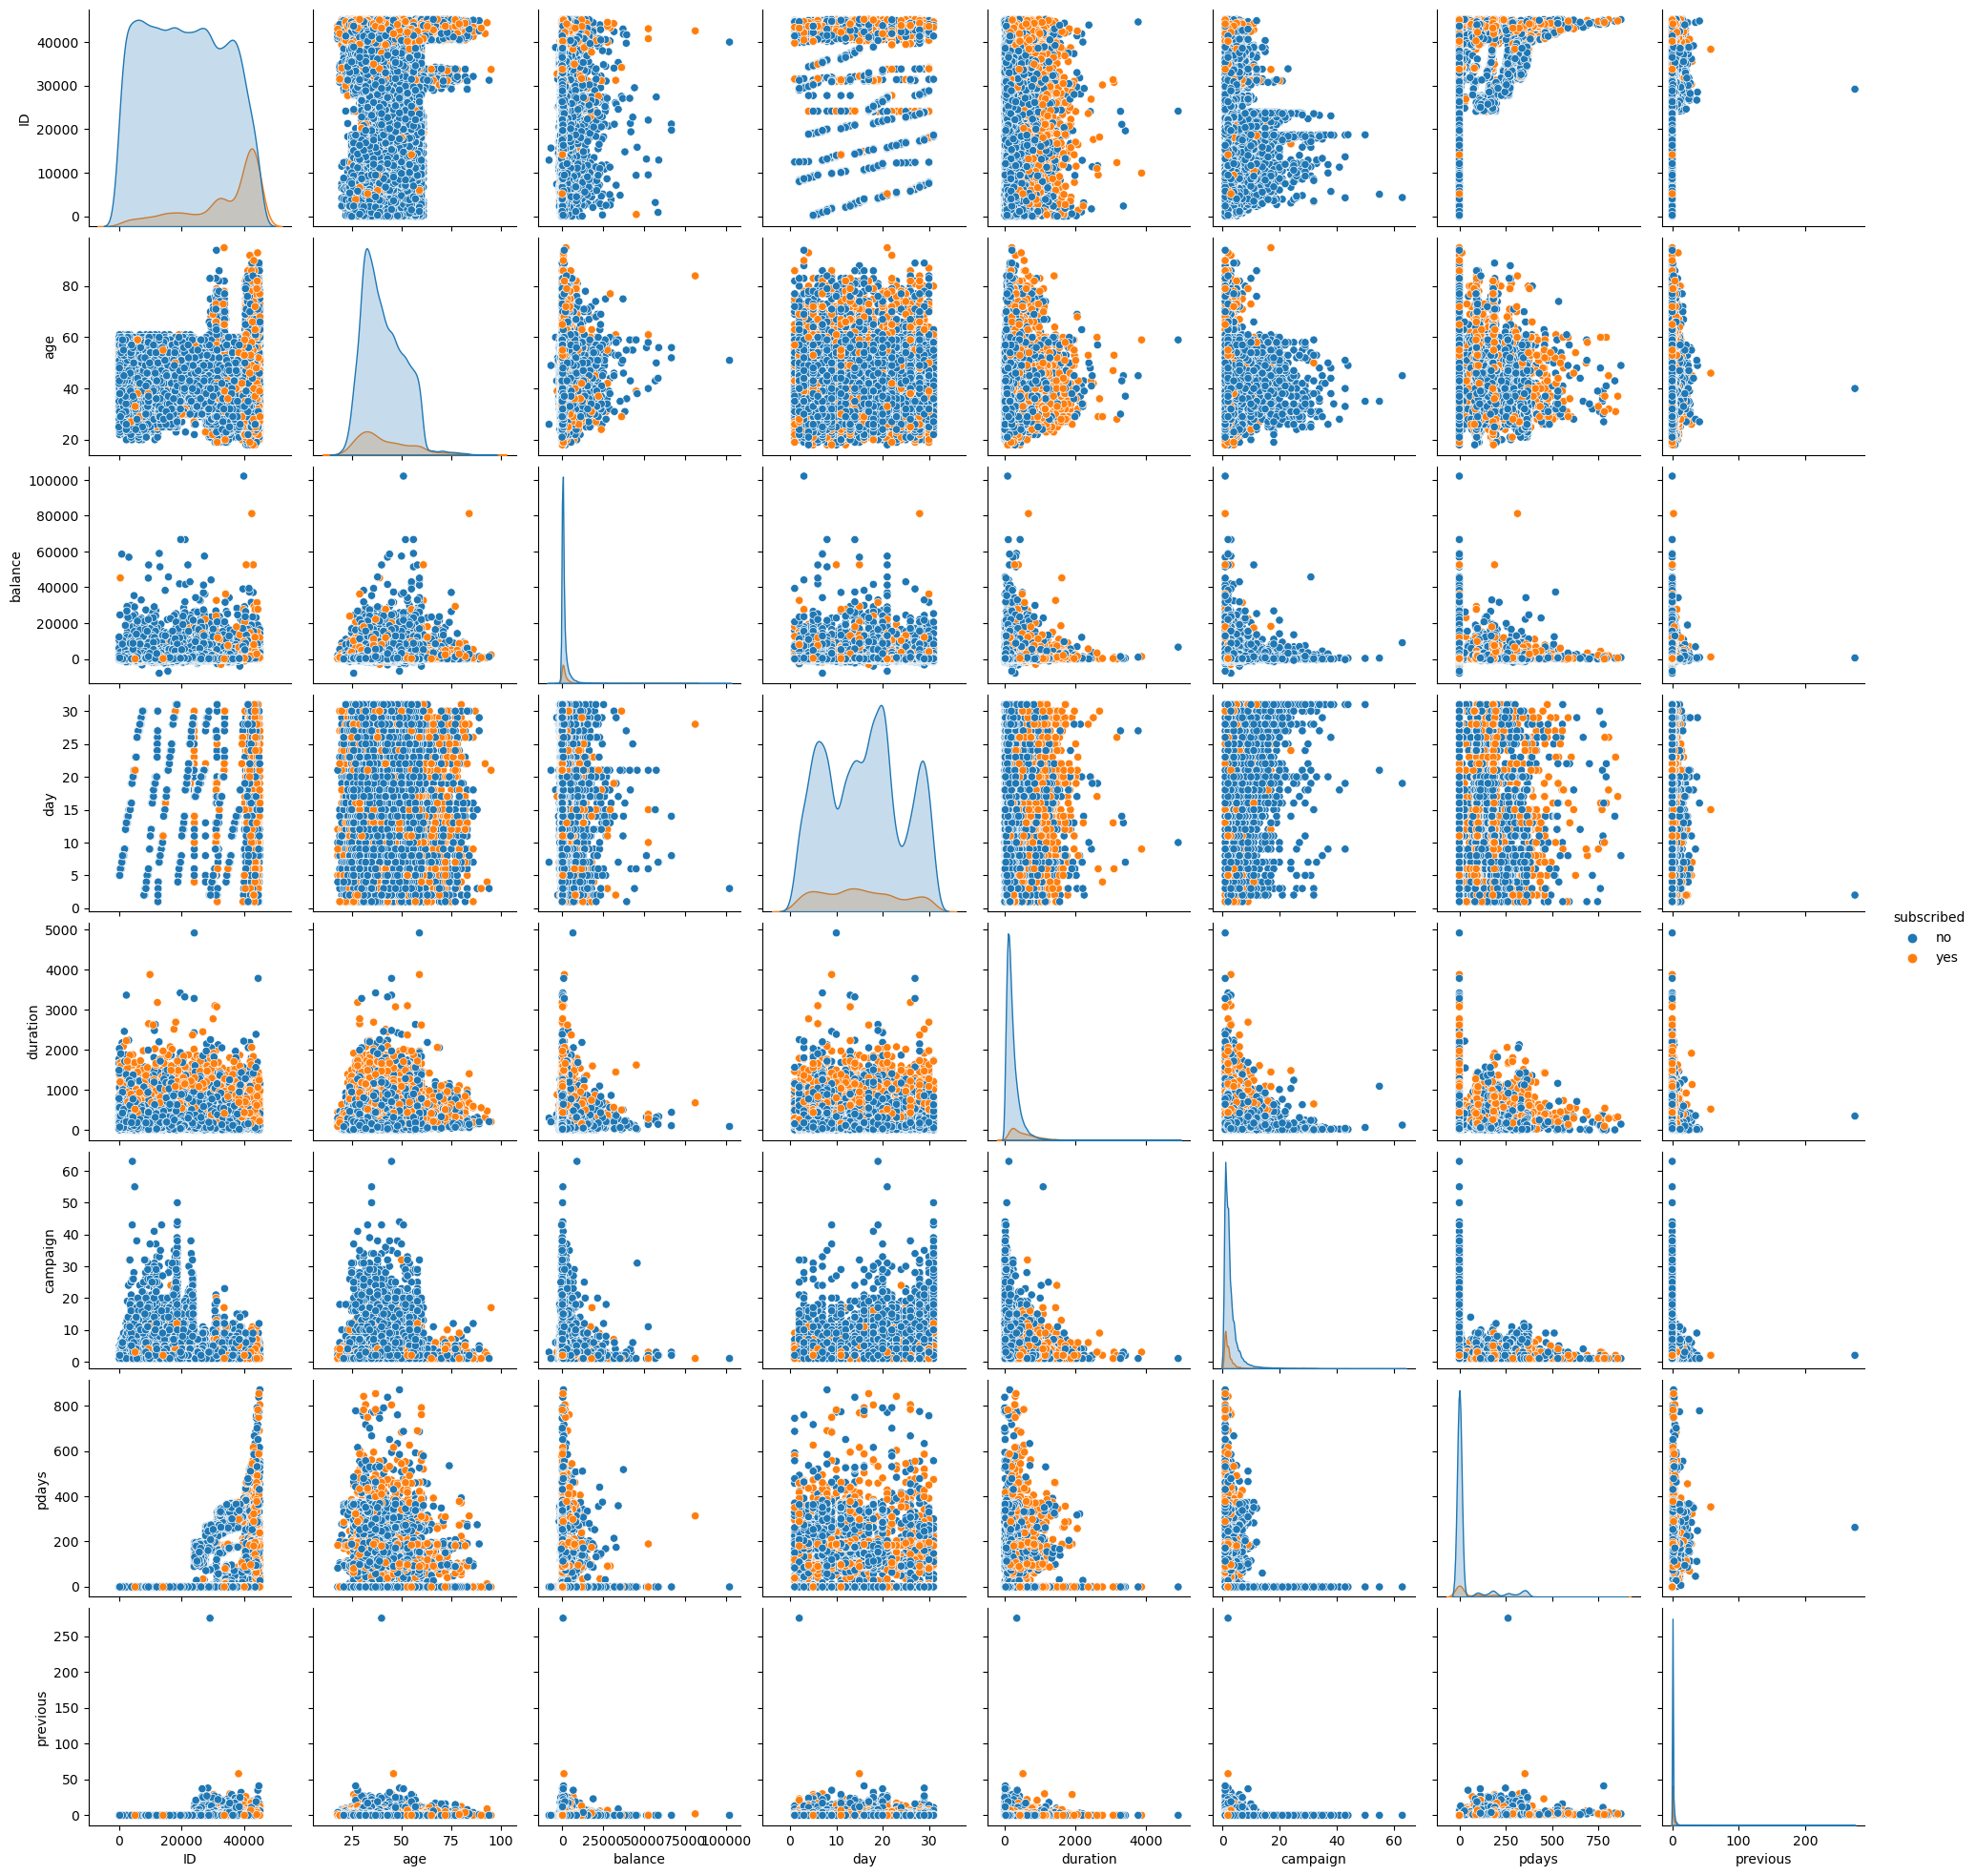

In [187]:
sns.pairplot(train,hue="subscribed")
plt.show()

#### All the variables are dependent and overlapped with each others. So LINEAR REGRESSION can't be used for Prediction of the dataset.

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model

# Model Building

In [188]:
train=pd.read_csv('train.csv')

In [189]:
target=train['subscribed']

In [190]:
train=train.drop('subscribed',axis=1)

In [191]:
train=pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set. 

# Logistic Regression

In [192]:
from sklearn.model_selection import train_test_split 

In [193]:
x_train,x_val,y_train,y_val=train_test_split(train,target,test_size=0.2,random_state=12)

In [194]:
from sklearn.linear_model import LogisticRegression

In [195]:
lreg=LogisticRegression()

In [196]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [197]:
prediction=lreg.predict(x_val)

In [198]:
from sklearn.metrics import accuracy_score

In [199]:
accuracy_score(y_val,prediction)

0.8921011058451817

LogisticRegression has linear decision boundary. What if our data doesn't have linearity.

# Decision Tree

In [200]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
clf=DecisionTreeClassifier(max_depth=5,random_state=0)

In [202]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [203]:
prediction=clf.predict(x_val)

In [204]:
accuracy_score(y_val,prediction)

0.9063191153238547

#### By using decision tree classifier we get *90%* efficiency.

In [205]:
test=pd.get_dummies(test)

In [206]:
test_prediction=clf.predict(test)

Now we creat a submission files containing the test_prediction

In [207]:
submission=pd.DataFrame()

In [208]:
submission['ID']=test['ID']

In [209]:
submission['subscribed']=test_prediction

Since in test prediction we have 1 and 0 as output for subscribed ,so we convert it into yes or no

In [210]:
submission['subscribed'].replace(0,'no', inplace=True)

In [211]:
submission['subscribed'].replace(1,'yes',inplace=True)

Saving it into csv file -

In [212]:
submission_new=submission

In [213]:
submission_new.to_csv('submission_new.csv',header=True,)